In [1]:
#Importar librerias 
import numpy as np 
import matplotlib.pyplot as plt
from math import sqrt 

#Definir funciones
# Funcion Rosenbrock
def rosenbrock(x):
    n = len(x)
    suma = 0
    for i in range(n-1):
        suma += 100*(x[i+1]-x[i]**2)**2+(1-x[i])**2
    return suma
# Funcion wood
def wood(x):
    return sum((
        100*(x[0]*x[0] - x[1])**2,
        (x[0]-1)**2,
        (x[2]-1)**2,
        90*(x[2]*x[2] - x[3])**2,
        10.1*((x[1]-1)**2 + (x[3]-1)**2),
        19.8*(x[1]-1)*(x[3]-1),
        ))
#ultima funcion - funcion3, l: lambda
def funcion3(l, x):
    n = len(x)
    t = np.zeros(n)
    y = np.zeros(n)
    for i in range (n):
        t[i] = ((2/(n-1))*(i-1)-1)
    for i in range(1, n):
        y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

#Funciones de gradiente y Hessiano 
#Implementar gradiente y hessiano como diferencias finitas
#Gradiente 
def grad(x,xx, function, n, h):
    fprime = np.zeros(n)
    for i in range(n):
        x[i] = x[i]+h
        delante = function(x)
        x[i] = x[i]-2*h
        atras = function(x)
        fprime[i] = (delante-atras)/(2*h)
        x = np.copy(xx)
    return fprime

#Hessiano - desarrollado con diferencias finitas
def hessian(x, xx, function, n, h):
    hessian = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            x[i] = x[i]+h 
            x[j] = x[j]+h
            d = function(x)
            x[j] = x[j]-2*h
            a = function(x)
            #regresar al valor de x original
            x = np.copy(xx)

            x[i] = x[i]-h 
            x[j] = x[j]+h
            dd = function(x)
            x[j] = x[j]-2*h
            aa = function(x)
            #regresar al original
            x = np.copy(xx)
            
            #llenar matriz
            hessian[i][j] = (d-a-dd+aa)/(4*h*h)

    return hessian

def steepest_descent(function, x, alpha, n, h, TOL, iteraciones):
    fun = []
    norm = []
    for i in range(iteraciones):
        #print("sd i: ", i)
        g0 = grad(x, x, function, n, h)
        fun.append(function(x))
        norm.append(np.linalg.norm(g0))
        #reemplazar el valor de x
        x = x-alpha*g0/np.linalg.norm(g0)
        if np.linalg.norm(g0) < TOL:
            #regresar por la tolerancia
            return x, norm, fun,  i+1
    return x, norm, fun, iteraciones

In [2]:
def bisection_with_wolfe_conditions(x, function, alpha, beta, c1, c2, num, max_iter, h):
    n = len(x)
    g0 = grad(x, x, function, n, h)
    d = -g0
    alpha_init = 0
    for i in range(max_iter):
        if (function(x+alpha*d) > function(x) + c1*alpha*np.dot(g0, d)):
            beta = alpha
            alpha = (0.5)*(alpha_init+beta)
        elif np.dot(grad(x+alpha*d, x+alpha*d, function, n, h), d) < c2*np.dot(grad(x, x, function, n, h), d):
            alpha_init = alpha
            if (beta > num):
                alpha = 2*alpha_init
            else:
                alpha = (0.5)*(alpha_init+beta)
        else:
            return alpha
    return alpha

In [15]:
def zoom(x, function, alpha_init, alpha, c1, c2, beta, h, num, max_iter):
    n = len(x)
    alphak = bisection_with_wolfe_conditions(x, function, alpha, beta, c1, c2, num, max_iter, h)
    d = grad(x, x, function, n, h)
    for i in range(max_iter):
        if (function(x+alphak*d) > function(x) + c1*alphak*np.linalg.norm(grad(x, x, function, n, h))) or function(x+alphak*d) >= function(x+alpha_init*d):
            alpha_end = alphak
        else:
            prime = np.linalg.norm(grad(x+alphak*d, x+alphak*d, function, n, h))
            if abs(prime) <= -c2*np.linalg.norm(grad(x, x, function, n, h)):
                return alphak
            if prime*(alpha_end-alpha_init) >= 0:
                alpha_end = alpha_init
            alpha_init = alphak
    return alphak

In [27]:

def line_search(x, function, alpha_init, alpha_end, c1, c2,beta, h, zoom_iter, max_iter):
    for i in range(max_iter):
        n = len(x)
        alpha1 = 0.5*(alpha_init+alpha_end)
        d = grad(x, x, function, n, h)
        d = -d/np.linalg.norm(d)
        
        phi = function(x+alpha1*d)
        if (phi > function(x) + c1*alpha1*np.dot(d, grad(x, x, function, n, h)) or phi >= function(x+alpha_init*d)):
            alpha_asterisco = zoom(x, function, alpha_init, alpha1, c1, c2, beta, h, num, max_iter)
            return alpha_asterisco
        g = np.dot(d, grad(x+alpha*d, x+alpha*d, function, n, h))
        g = np.linalg.norm(g)
        if (abs(g) <= -c2*np.dot(d, grad(x, x, function, n, h))):
            alpha_asterisco = alpha1
            return alpha_asterisco
        if (g >= 0):
            alpha_asterisco = zoom(x, function, alpha_init, alpha1, c1, c2, beta, h, num, max_iter)
            return alpha_asterisco
        alpha1 = (0.5)*(alpha1+alpha_max)
    return alpha_asterisco

## Rosenbrock n = 2

El minimo es:  [-1.01606519  1.06767694]  con alpha:  0.024462890625


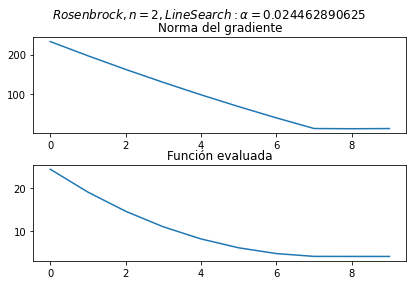

In [25]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
x = [-1.2, 1]
n = 2
a = 0.1 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.2
num = 1000
max_iter = 10
h = 0.00001
TOL = 10e-4
zoom_iter = 10
beta = 100

alpha_back = line_search(x, rosenbrock, a, 50, c1, c2,beta, h, zoom_iter, max_iter)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Rosenbrock, n=2, Line Search: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_2_line_search_punto_inicial.png')

## Rosenbrock n = 2, aleatorio

El minimo es:  [0.91719065 0.84563065]  con alpha:  0.003057861328125


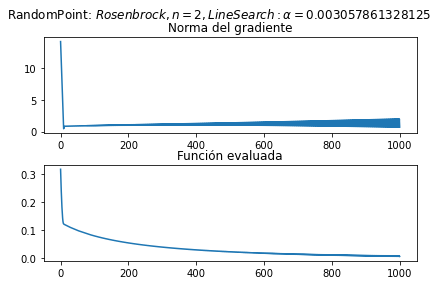

In [36]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
n = 2
x = np.random.rand(n)
a = 0.1 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.9
num = 1000
max_iter = 1000
h = 0.00001
TOL = 10e-4
zoom_iter = 100
beta = 1000

alpha_back = line_search(x, rosenbrock, a, 50, c1, c2,beta, h, zoom_iter, max_iter)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'RandomPoint: $Rosenbrock, n=2, Line Search: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_2_line_search_punto_aleatorio.png')

## Rosenbrock n = 100

El minimo es:  [-0.99717298  1.00063985  1.00178247  1.00172443  1.00122967  1.00072519
  1.00036903  1.0001657   1.00006662  1.00002424  1.00000805  1.00000246
  1.00000069  1.00000018  1.00000004  1.00000001  1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          0.99999999  0.99999997  0.99999986
  0.99999937  0.9999973   0.99998908  0.99995836  0

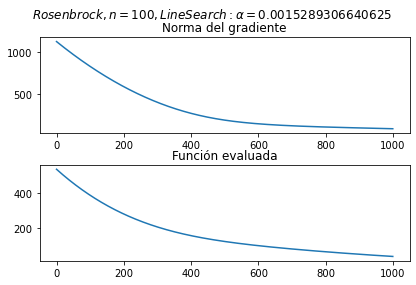

In [41]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
n = 100
x = np.ones(n)
x[0] = -1.2
x[n-2] = -1.2
a = 0.1 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.9
num = 1000
max_iter = 1000
h = 0.00001
TOL = 10e-4
zoom_iter = 10
beta = 100

alpha_back = line_search(x, rosenbrock, a, 50, c1, c2,beta, h, zoom_iter, max_iter)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Rosenbrock, n=100, Line Search: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_100_line_search_punto_inicial.png')

El minimo es:  [0.84996089 0.74645828 0.6068694  0.44273771 0.28285787 0.15730672
 0.0838133  0.08270157 0.15190795 0.20388829 0.20084591 0.1507159
 0.09616429 0.11672319 0.23922845 0.30062095 0.29587361 0.2624434
 0.25573497 0.28137578 0.28810592 0.2630602  0.23920549 0.26856395
 0.35289473 0.44856433 0.51294149 0.52609883 0.48478025 0.39739418
 0.28583548 0.18223462 0.11576287 0.10264869 0.0931334  0.06563613
 0.03812635 0.03036291 0.03175209 0.03182605 0.04008276 0.05983975
 0.0681295  0.07703884 0.18611867 0.42230669 0.61194845 0.72246904
 0.7680322  0.76796109 0.7405121  0.70456129 0.67495759 0.65300884
 0.63205488 0.61146314 0.59521446 0.57605486 0.53258263 0.44934843
 0.3355373  0.23531547 0.22038199 0.34071894 0.49898987 0.61486951
 0.67827488 0.70137801 0.70177258 0.69861857 0.70637786 0.7238586
 0.7348569  0.72230419 0.67544099 0.58994957 0.46972316 0.33155123
 0.20889557 0.15302626 0.23082525 0.39398546 0.52553794 0.58465858
 0.56742489 0.4812045  0.34967676 0.2262179  0.177

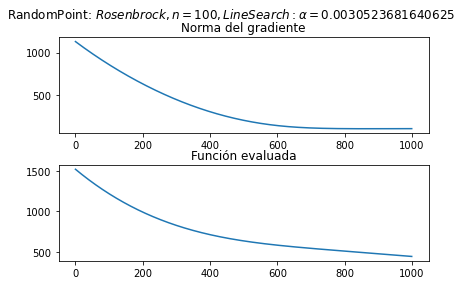

In [44]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
n = 100
x = np.random.rand(n)
a = 0.01 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.7
num = 1000
max_iter = 1000
h = 0.00001
TOL = 10e-4
zoom_iter = 10
beta = 100

alpha_back = line_search(x, rosenbrock, a, 50, c1, c2,beta, h, zoom_iter, max_iter)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'RandomPoint: $Rosenbrock, n=100, Line Search: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_100_line_search_punto_aleatorio.png')

## Wood Function

El minimo es:  [-0.74950481  0.57174551  1.17066124  1.37195986]  con alpha:  0.000381622314453125


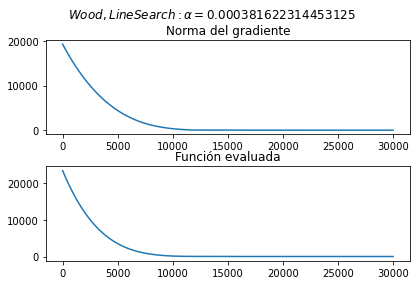

In [51]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
n = 4
x = [-3, -1, -3, -1]
a = 0.02 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.5
num = 1000
max_iter = 30000
h = 0.00001
TOL = 10e-4
zoom_iter = 100
beta = 100

alpha_back = line_search(x, wood, a, 50, c1, c2,beta, h, zoom_iter, max_iter)
x_back, norm_back, fun_back, max_iter = steepest_descent(wood, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Wood, Line Search: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('wood_line_search_punto_inicial.png')

## Wood aleatorio

El minimo es:  [0.99879695 0.99745112 1.0011812  1.00242054]  con alpha:  0.0015264892578125


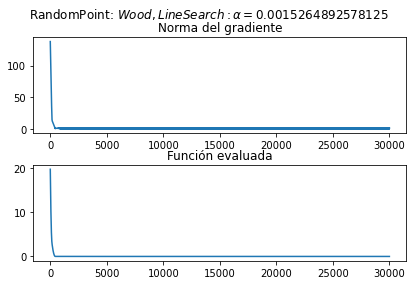

In [57]:
#punto inicial
#Condiciones
n = 4
x = np.random.rand(n)
a = 0.02 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.5
num = 1000
max_iter = 30000
h = 0.00001
TOL = 10e-4
zoom_iter = 100
beta = 100

alpha_back = line_search(x, wood, a, 50, c1, c2,beta, h, zoom_iter, max_iter)
x_back, norm_back, fun_back, max_iter = steepest_descent(wood, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'RandomPoint: $Wood, Line Search: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('wood_line_search_punto_aleatorio.png')

## ultima funcion

In [67]:
n = 128
#ultima funcion - funcion3, l: lambda
# para lambda = 1
l = 100
sigma = 5
def funcion3(x):
    n = len(x)
    t = np.zeros(n)
    y = np.zeros(n)
    for i in range (n):
        t[i] = ((2/(n-1))*(i-1)-1)
    for i in range(1, n):
        y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

El minimo es:  [0.80804509 0.89854094 0.84023618 0.11667533 0.9454717  0.70039627
 0.57654784 0.72185414 0.05785411 0.28688197 0.27870906 0.82704478
 0.00664508 0.36412528 0.14025785 0.23583583 0.69559916 0.48496748
 0.08873174 0.21119696 0.40668139 0.58687654 0.06793256 0.17266555
 0.19985826 0.71779835 0.79750154 0.23077485 0.35968465 0.68407399
 0.50222985 0.50129457 0.34054386 0.60547593 0.16126941 0.80285156
 0.25565472 0.28124829 0.42380162 0.1049436  0.47966632 0.97453433
 0.13926477 0.85916817 0.54203233 0.35312225 0.12539358 0.3253714
 0.33406579 0.91689138 0.11492415 0.33763281 0.81142108 0.61046628
 0.13432642 0.55635796 0.12336839 0.74000282 0.38647657 0.99362989
 0.10559747 0.29498422 0.66557502 0.29632516 0.7783638  0.23512048
 0.83308413 0.97907632 0.05355076 0.46056393 0.36018362 0.9570215
 0.31532935 0.09234418 0.56406876 0.63673249 0.32008846 0.86862169
 0.70034352 0.87078634 0.21213975 0.53832411 0.63366148 0.22800218
 0.9819931  0.84090426 0.18654893 0.63614659 0.69

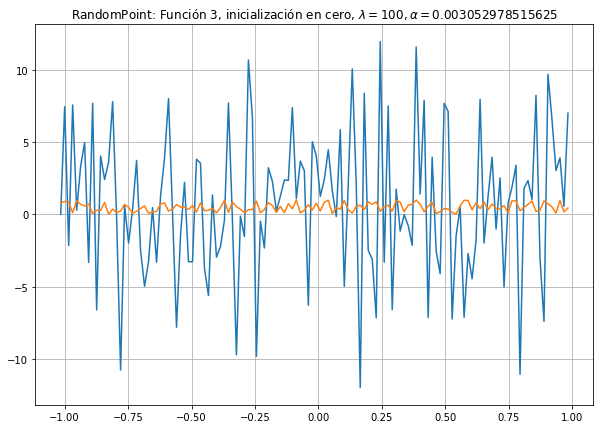

In [68]:
#punto inicial
#Condiciones
n = 128
x = np.random.rand(n)
a = 0.02 #alpha_0
b = 1000 #beta
c1 = 10e-4
c2 = 0.5
num = 1000
max_iter = 100
h = 0.00001
TOL = 10e-4
zoom_iter = 10
beta = 100

alpha_back = line_search(x, wood, a, 50, c1, c2,beta, h, zoom_iter, max_iter)
x_back, norm_back, fun_back, max_iter = steepest_descent(funcion3, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
#para graficar
t = np.zeros(n)
y = np.zeros(n)
for i in range (n):
    t[i] = ((2/(n-1))*(i-1)-1)
for i in range(1, n):
    y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria
#
plt.figure(figsize = (10, 7))
plt.plot(t, y, label = 't, y')
plt.plot(t, x_back, label = r't, $x^{*}$')
plt.grid()
plt.title(r'RandomPoint: Función 3, inicialización en cero, $\lambda = 100, \alpha = {} $'.format(alpha_back))
plt.savefig("Funcion3_vector_aleatorio_line_search_lamba100.png")